In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

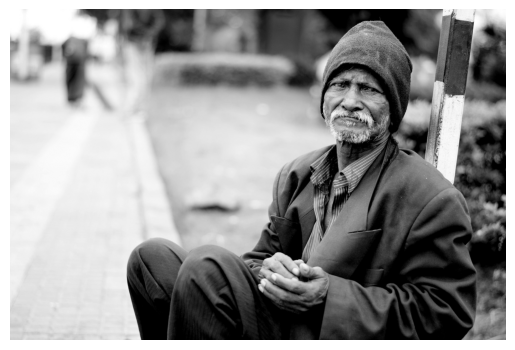

In [46]:
image = cv2.imread('old-man.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

Turn image in spatial domain to frequency domain, shift zero frequency compoment to the center

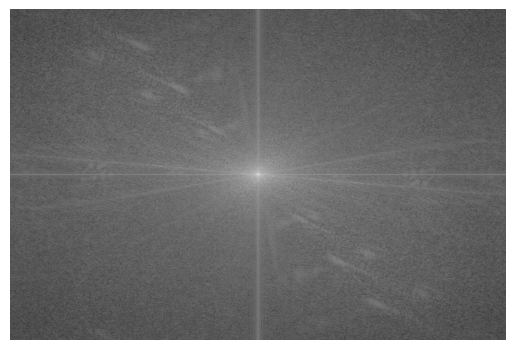

In [47]:
dft = np.fft.fft2(image)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log(np.abs(dft_shift) + 1) # Scale to 0 and 1 by log of 10

# Plot the frequncy image
plt.imshow(magnitude_spectrum, cmap='gray')
plt.axis('off')
plt.show()

Creating ideal low pass and butterworth low pass filter

In [48]:
# Ideal low pass filter
def ideal_low_pass(image, cutoff):
    rows, cols = image.shape
    crows, ccols = rows//2, cols//2
    mask = np.zeros((rows, cols), np.uint8)
    for u in range(rows):
        for v in range(cols):
            if np.sqrt((u - crows)**2 + (v - ccols)**2) <= cutoff:
                mask[u, v] = 1
    return mask

# Butterworth low pass filter
def butterworth_low_pass(image, cutoff, order):
    rows, cols = image.shape
    crows, ccols = rows // 2, cols // 2
    u = np.arange(rows)
    v = np.arange(cols)
    U, V = np.meshgrid(u - crows, v - ccols, indexing='ij')
    D = np.sqrt(U**2 + V**2)
    mask = 1 / (1 + (D / cutoff)**(2 * order))
    return mask.astype(np.float32)
            

In [49]:
# Create filter 
ideal_filter = ideal_low_pass(image, cutoff=50)
butterworth_filter = butterworth_low_pass(image, cutoff=50, order=4)

ideal_img_freq = dft_shift * ideal_filter
butterworth_img_freq = dft_shift * butterworth_filter

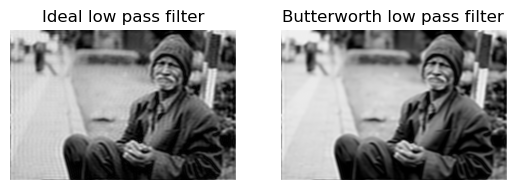

In [50]:
# Convert frequency domain back to spatial domain
ideal_img = np.abs(np.fft.ifft2(np.fft.ifftshift(ideal_img_freq))) # shift back zero frequency compoment back to the left coner
butterworth_img = np.abs(np.fft.ifft2(np.fft.ifftshift(butterworth_img_freq)))

# Display the image
plt.subplot(1,2,1), plt.imshow(ideal_img, cmap='gray'), plt.title('Ideal low pass filter'), plt.axis('off')
plt.subplot(1,2,2), plt.imshow(butterworth_img, cmap='gray'), plt.title('Butterworth low pass filter'), plt.axis('off')
plt.show()